In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

In [486]:
ph = 0.25 # Probability of a head
# O -> head
# 1 -> tail

In [487]:
states = [i for i in range(101)]

In [488]:
def expectedReturn(state, action, stateValues):
    returns = 0

    returns += ph*stateValues[min(state + action, 100)]
    returns += (1-ph)*stateValues[state - action]

    return returns

In [489]:
values = {state:0 for state in states}
values[100] = 1
delta = 1e-7
sweeps = []

while True:
    newValues = values.copy()
    for state in states[1:-1]:
        for action in range(1, state+1):
            expected_return = expectedReturn(state, action, values)
            if expected_return > values[state]:
                newValues[state] = expected_return
    if (np.abs(np.array(list(values.values())) - np.array(list(newValues.values()))).max() <= delta):
        print("Optimal Values reached")
        break

    values = newValues.copy()
    sweeps.append(list(values.values()))

Optimal Values reached


In [490]:
pi = {state: 0 for state in states}

for state in states[1:-1]:
    old_max = 0
    for action in range(1, state+1):
        expected_return = expectedReturn(state, action, values)
        if expected_return > old_max:
            pi[state] = action
            old_max = expected_return

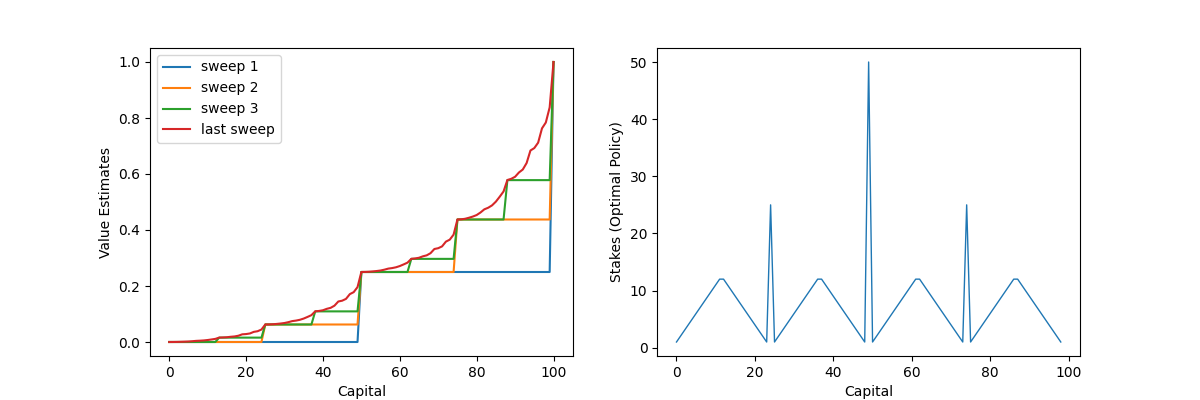

In [491]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].set_xlabel("Capital")
ax[0].set_ylabel("Value Estimates")
for i, vals in enumerate(sweeps[:3]):
    ax[0].plot(vals, label=f"sweep {i+1}")

ax[0].plot(sweeps[-1], label=f"last sweep")

ax[0].legend()

ax[1].set_xlabel("Capital")
ax[1].set_ylabel("Stakes (Optimal Policy)")
ax[1].plot(list(pi.values())[1:-1], lw=1)
# ax[1].scatter(np.arange(101), list(pi.values()), s=2)